## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import StandardScaler,LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

### Load the dataset

In [2]:
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1. Make a list of categorical and numerical columns in the data.

In [3]:
#checking the columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [4]:
cat_columns = list(df.describe(include = 'O'))
Num_columns = list(df.describe())
print('Categorical Columns : ',cat_columns)
print('Numerical Columns : ', Num_columns)

Categorical Columns :  ['sex', 'smoker', 'day', 'time']
Numerical Columns :  ['total_bill', 'tip', 'size']


### 2. Compute the average bill amount for each day.

In [5]:
avg_amt = df.groupby('day')['total_bill'].mean()

print(avg_amt)

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64


### 3. Which gender is more generous in giving tips?

In [6]:
tip_avg = df.groupby('sex', as_index= False).tip.mean()

print(tip_avg)

      sex       tip
0  Female  2.833448
1    Male  3.089618


  - **Male** gender is more genrous than female with average tip of 3.09

### 4. According to the data, were there more customers for dinner or lunch?

In [7]:
cust_count = df.groupby('time')['size'].count()
print(cust_count)

time
Dinner    176
Lunch      68
Name: size, dtype: int64


-  There were more customers for the **dinner**

### 5. Based on the statistical summary, comment on the variable 'tip'

In [8]:
df['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

- **total no. of tips** given by customers on **244** bills 
- **the average tip** given by customers **2.99 (~ 3) USD**
- **Standard deviation** in tips **1.38 USD**
- Tip was given in the range of **1 USD** to **10 USD**
- median : **2.90 USD** which is less than mean value **2.99 (~ 3) USD**

### 6. Find the busiest day in terms of the orders?

In [9]:
busy_days = df.groupby('day')['size'].sum().sort_values()
print(busy_days)

day
Fri      40
Thur    152
Sun     216
Sat     219
Name: size, dtype: int64


- **Saturday** is the busiest day

### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

In [10]:
skew_in_total_bill = df['total_bill'].skew()
print('Skewness in Total_bill : ', skew_in_total_bill)

Skewness in Total_bill :  1.1332130376158205


- **YES** , total_bill variable is skewed

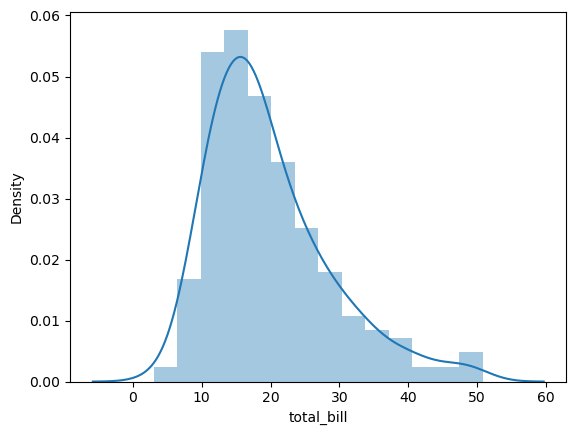

In [11]:
sns.distplot(df['total_bill'])
plt.show()

- **Positive Skewness (right Skewness)** in 'total_bill' is depicted by the above distribution graph

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

In [12]:
df[['tip', 'total_bill']].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


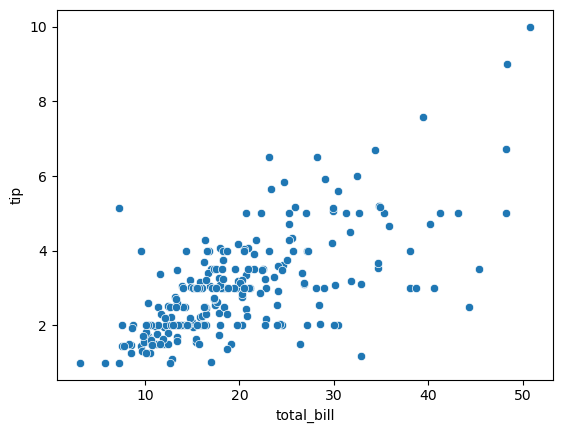

In [13]:
sns.scatterplot(x='total_bill', y = 'tip' , data = df)
plt.show()

- **Positive correlation** between 'tip' and 'total_bill'.

### 9. What is the percentage of males and females in the dataset? and display it in the plot

In [14]:
gender_percent = df['sex'].value_counts(normalize= True)*100
print("Number of Males and Females in dataset : \n", gender_percent )

Number of Males and Females in dataset : 
 Male      64.344262
Female    35.655738
Name: sex, dtype: float64


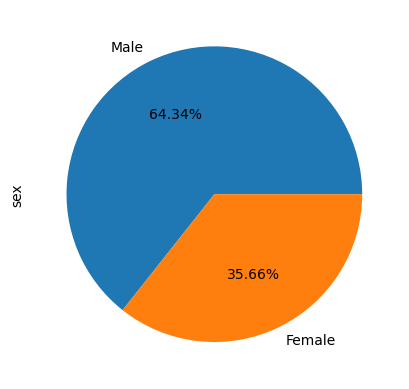

In [15]:
gender_percent.plot(kind = 'pie', autopct = '%.2f%%')
plt.show()

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

In [16]:
genderwise_count = df.groupby('sex')['smoker'].value_counts()

print(genderwise_count)

sex     smoker
Female  No        54
        Yes       33
Male    No        97
        Yes       60
Name: smoker, dtype: int64


In [17]:
df.groupby('sex', as_index= False).smoker.value_counts()


,sex,smoker,count
0,Female,No,54
1,Female,Yes,33
2,Male,No,97
3,Male,Yes,60


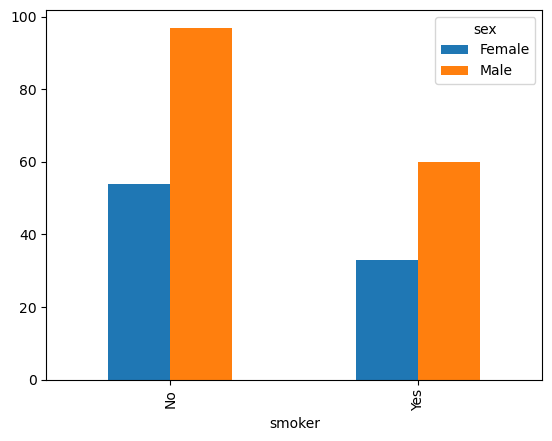

In [18]:
pd.crosstab(df['smoker'], df['sex']).plot(kind = 'bar')
plt.show()

- **In the crosstab depiction:**
- overall non-smokers are more than smokers
- **Male** smkoers are more than **Female** smokers

### 11. Compute the average tip amount given for different days and display it in the plot.

In [19]:
avg_tip = df.groupby('day')['tip'].mean()
print(avg_tip)

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64


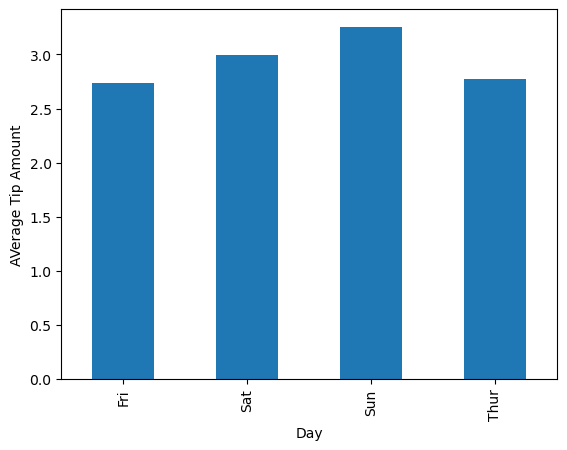

In [20]:
avg_tip.plot.bar( x = 'day', y = 'tip')

plt.ylabel('AVerage Tip Amount')
plt.xlabel('Day')
plt.show()

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

In [21]:
avg_bill = df.groupby('size')['total_bill'].mean()
print(avg_bill)

size
1     7.242500
2    16.448013
3    23.277632
4    28.613514
5    30.068000
6    34.830000
Name: total_bill, dtype: float64


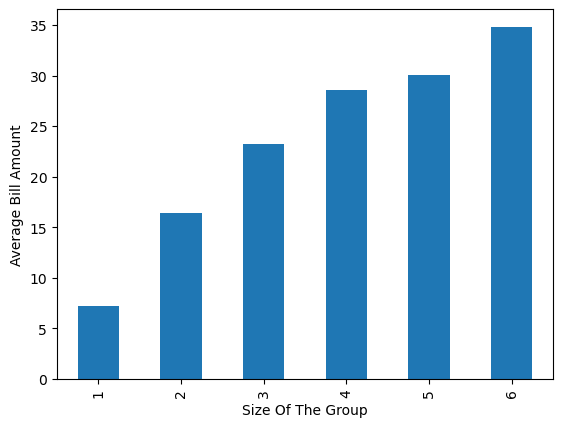

In [22]:
avg_bill.plot.bar(x= 'size', y = 'total_bill')
plt.xlabel('Size Of The Group')
plt.ylabel('Average Bill Amount')
plt.show()

- **bill amount** is dependent on Size of the group of people.
- amount is increasing with respect to the increasing size of group.

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

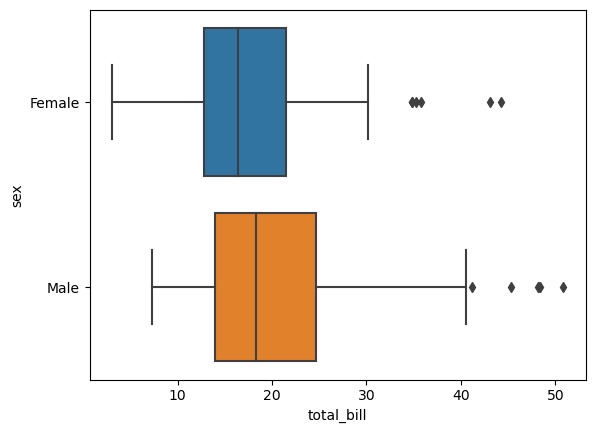

In [23]:
sns.boxplot(x= 'total_bill', y = 'sex', data = df)
plt.show()

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [24]:
#checking the data
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [25]:
#finding max total_bill for lunch and dinner for different days
series =  df.groupby(['time', 'day'])['total_bill'].max()
print(series)

time    day 
Dinner  Fri     40.17
        Sat     50.81
        Sun     48.17
        Thur    18.78
Lunch   Fri     16.27
        Thur    43.11
Name: total_bill, dtype: float64


In [26]:
df[(df['time'].isin(['Lunch', 'Dinner'])) & (df['day'].isin(['Sat', 'Sun']))].groupby(['time','day'])['total_bill'].max()

time    day
Dinner  Sat    50.81
        Sun    48.17
Name: total_bill, dtype: float64

In [27]:
df_x = df.groupby(['time','day'], as_index=False)['total_bill'].max()
df_x[ (df_x['day'] == 'Sat') | (df_x['day'] == 'Sun') ]

,time,day,total_bill
1,Dinner,Sat,50.81
2,Dinner,Sun,48.17


- Maximum bill amount for dinner on Saturday - 50.81 USD
- Maximum bill amount for dinner on Sunday - 48.17 USD
- No data is present for lunch for the days (saturday and Sunday)

### 15. Compute the percentage of missing values in the dataset.

In [28]:
percent_missing = df.isnull().sum() * 100 / len(df)

pd.DataFrame({'column_name': df.columns, 'percent_missing': percent_missing})

,column_name,percent_missing
total_bill,total_bill,0.0
tip,tip,0.0
sex,sex,0.0
smoker,smoker,0.0
day,day,0.0
time,time,0.0
size,size,0.0


In [29]:
df.isnull().mean() * 100

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

- No missing value is found in the dataset

### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [30]:
# Find the duplicate records
len(df[df.duplicated()])

1

In [31]:
# Drop the duplicate records
df.drop_duplicates(inplace = True)

In [32]:
# Recheck the duplicate records
len(df[df.duplicated()])

0

### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

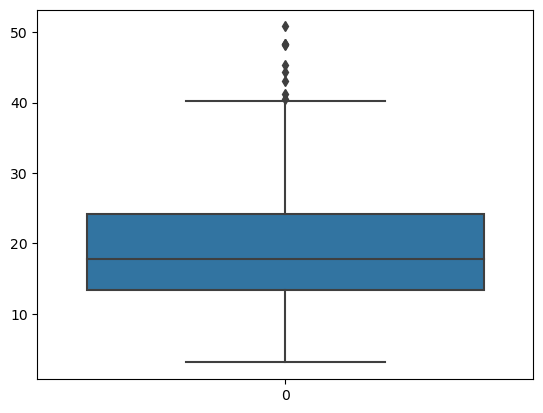

In [33]:
sns.boxplot(df['total_bill'])
plt.show()

- **Yes,** Outliers are present in the above boxplot depiction

In [34]:
# Transform Total_bill in log values
df['total_bill_trans'] = np.log(df['total_bill'])

#check the table 
df.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_trans
0,16.99,1.01,Female,No,Sun,Dinner,2,2.832625
1,10.34,1.66,Male,No,Sun,Dinner,3,2.336020
2,21.01,3.50,Male,No,Sun,Dinner,3,3.044999
3,23.68,3.31,Male,No,Sun,Dinner,2,3.164631
4,24.59,3.61,Female,No,Sun,Dinner,4,3.202340


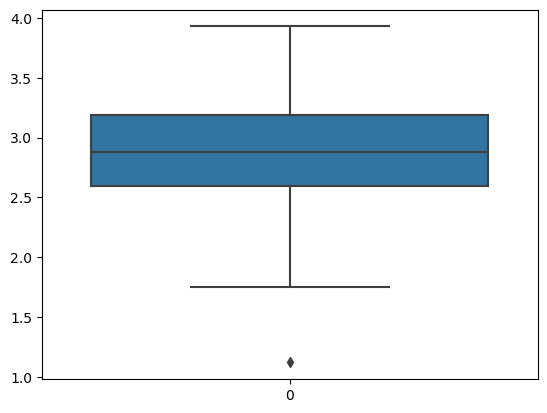

In [35]:
# Recheck the  outliers in transformed total_bill
sns.boxplot(df['total_bill_trans'])
plt.show()

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

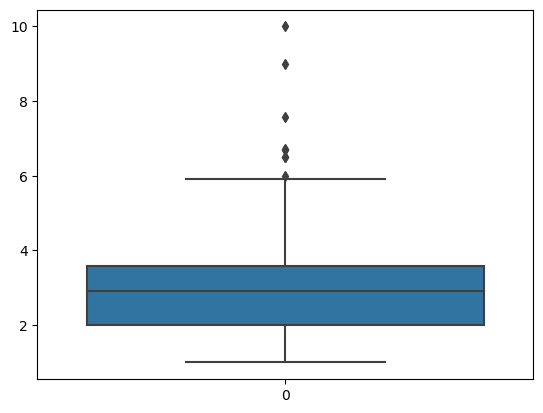

In [36]:
sns.boxplot(df['tip'])
plt.show()

- **Yes,** The outliers are present in column 'tip'

In [37]:
# First Quartile
Q1 = df['tip'].quantile(0.25)

# Third quartile
Q3 = df['tip'].quantile(0.75)

# Inter Quartile Range
iqr = Q3 - Q1

lower_whisker = Q1 - (1.5*iqr)
print("Lower limit : ", lower_whisker)
upper_whisker = Q3 + (1.5*iqr)
print("Upper limit : ", upper_whisker)

Lower limit :  -0.36250000000000027
Upper limit :  5.9375


In [38]:
df_out = df.loc[(df['tip'] < upper_whisker) & ( df['tip'] > lower_whisker)]

print("DATA without Outliers :")
df_out

DATA without Outliers :


,total_bill,tip,sex,smoker,day,time,size,total_bill_trans
0,16.99,1.01,Female,No,Sun,Dinner,2,2.832625
1,10.34,1.66,Male,No,Sun,Dinner,3,2.336020
2,21.01,3.50,Male,No,Sun,Dinner,3,3.044999
3,23.68,3.31,Male,No,Sun,Dinner,2,3.164631
4,24.59,3.61,Female,No,Sun,Dinner,4,3.202340
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,3.368330
240,27.18,2.00,Female,Yes,Sat,Dinner,2,3.302481
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3.121042
242,17.82,1.75,Male,No,Sat,Dinner,2,2.880321


### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [39]:
df_encode = pd.get_dummies(df, drop_first = True)

df_encode.head(5)

,total_bill,tip,size,total_bill_trans,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,2.832625,0,0,0,1,0,0
1,10.34,1.66,3,2.336020,1,0,0,1,0,0
2,21.01,3.50,3,3.044999,1,0,0,1,0,0
3,23.68,3.31,2,3.164631,1,0,0,1,0,0
4,24.59,3.61,4,3.202340,0,0,0,1,0,0


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [40]:
#checking the range of current Total bill column
max_value = df['total_bill'].max()

min_value = df['total_bill'].min()

range_ = max_value - min_value
print(range_)

47.74


In [41]:
mm = MinMaxScaler()

# MinMaxScaler ->  Min/Max, where Range = 1

df['total_bill_mm'] = mm.fit_transform(df[['total_bill']])

In [42]:
# After MinMaxScaling
mm_max = df['total_bill_mm'].max()
mm_min = df['total_bill_mm'].min()

mm_range = mm_max - mm_min
print(mm_range)

0.9999999999999999


### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [43]:
tips_df = pd.read_csv('tips.csv')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [44]:
# i) Encode the categorical variables.

tips_df = pd.get_dummies(tips_df, drop_first= True)
tips_df.head()

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,0,0,0,1,0,0
1,10.34,1.66,3,1,0,0,1,0,0
2,21.01,3.50,3,1,0,0,1,0,0
3,23.68,3.31,2,1,0,0,1,0,0
4,24.59,3.61,4,0,0,0,1,0,0


In [45]:
# ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

X = tips_df.drop('tip',axis=1)
y = tips_df['tip']

# check the operations
print("~"*25 , 'All columns (except tip)', '~'*25)
print("\n" ,X.head() , '\n')

print("~"*25 , 'column Tip from y variable', '~'*25)
print("\n" ,y.head())


~~~~~~~~~~~~~~~~~~~~~~~~~ All columns (except tip) ~~~~~~~~~~~~~~~~~~~~~~~~~

    total_bill  size  sex_Male  smoker_Yes  day_Sat  day_Sun  day_Thur  \
0       16.99     2         0           0        0        1         0   
1       10.34     3         1           0        0        1         0   
2       21.01     3         1           0        0        1         0   
3       23.68     2         1           0        0        1         0   
4       24.59     4         0           0        0        1         0   

   time_Lunch  
0           0  
1           0  
2           0  
3           0  
4           0   

~~~~~~~~~~~~~~~~~~~~~~~~~ column Tip from y variable ~~~~~~~~~~~~~~~~~~~~~~~~~

 0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64


#  These topics are out of the covered sessions and I was told  to paste it .

### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state= 1)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)


(170, 8) (74, 8)
(170,) (74,)


In [47]:
## Scaling the data using min max scaling
mm = MinMaxScaler()
tips_scaled1 = tips_df.copy()

In [48]:
tips_scaled1.iloc[:,[0,2]] = mm.fit_transform(tips_scaled1.iloc[:, [0,2]])
tips_scaled1.head()

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,0.291579,1.01,0.2,0,0,0,1,0,0
1,0.152283,1.66,0.4,1,0,0,1,0,0
2,0.375786,3.50,0.4,1,0,0,1,0,0
3,0.431713,3.31,0.2,1,0,0,1,0,0
4,0.450775,3.61,0.6,0,0,0,1,0,0


In [49]:
X_train.iloc[:,:2] = mm.fit_transform(X_train.iloc[:,:2])
X_test.iloc[:,:2] = mm.transform(X_test.iloc[:,:2])

In [50]:
X_train.head()

,total_bill,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
59,0.998591,0.6,1,0,1,0,0,0
102,0.905355,0.4,0,1,1,0,0,0
147,0.143729,0.2,0,0,0,0,1,1
223,0.240254,0.4,0,0,0,0,0,1
88,0.445279,0.2,1,0,0,0,1,1


In [51]:
X_test.head()

,total_bill,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
67,-0.062940,0.0,0,1,1,0,0,0
243,0.306012,0.2,0,0,0,0,1,0
206,0.489432,0.4,1,1,1,0,0,0
122,0.199859,0.2,1,0,0,0,1,1
89,0.361907,0.2,1,0,0,0,1,1


### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [52]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [53]:
pred = lr.predict(X_test)
print('r2-score test:', r2_score(y_test,pred))

r2-score test: 0.4163737743303241


### Happy Learning:)